In [1]:
%load_ext autoreload
%autoreload 2

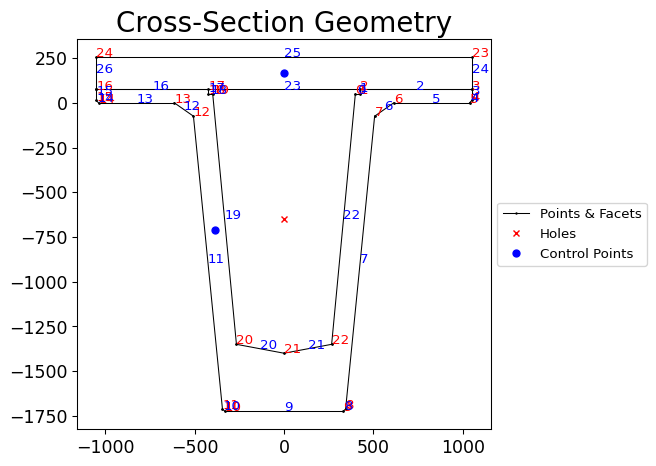

sectionproperties.pre.geometry.CompoundGeometry
object at: 0x193840588e0
Materials incl.: ['40 MPa', '65 MPa']


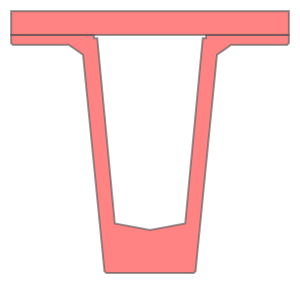

In [63]:
import sectionproperties.pre.library.bridge_sections as bridge_sections
import sectionproperties.pre.library.primitive_sections as standard_sections
from sectionproperties.pre.pre import Material
from sectionproperties.analysis.section import Section
from sectionproperties.pre.geometry import CompoundGeometry, round_polygon_vertices, Geometry
from shapely.wkt import loads, dumps
from shapely.geometry import Polygon, MultiPolygon

Dslab, w, t_f = 180, 2100, 75

precast = Material(
    name="65 MPa",
    elastic_modulus=37.4e3,
    poissons_ratio=0.2,
    yield_strength=65,
    density=2.4e-6,
    color="grey",
)
insitu = Material(
    name="40 MPa",
    elastic_modulus=32.8e3,
    poissons_ratio=0.2,
    yield_strength=40,
    density=2.4e-6,
    color="lightgrey",
)

super_t = bridge_sections.super_t_girder_section(girder_type=5, w=w, material=precast)
slab = standard_sections.rectangular_section(d=Dslab, b=w, material=insitu).align_center(super_t).align_to(super_t, "top")

geom = super_t + slab
geom.plot_geometry(labels=['points', 'facets'])
geom
# need to add a hole?
# geom.holes.append([0, -Dslab])


# geom.create_mesh(mesh_sizes=[500])

# sec = Section(geom)
# sec.plot_mesh()

# sec.calculate_geometric_properties()
# sec.calculate_warping_properties()
# sec.display_results(fmt=".3f")

In [12]:
from shapely.geometry import box
from shapely.affinity import translate

In [22]:
big_box = box(0, 0, 200, 200)
bottom_box = box(10.00001, 10.000001, 50.100, 50.2)
upper_box = box(120.000011, 120.000032, 169.999987, 170.0001)
test = big_box - bottom_box - upper_box

In [27]:
test_2 = round_polygon(test, 0)

In [64]:
test_2.wkt

'POLYGON ((0 200, 200 200, 200 0, 0 0, 0 200), (10 50, 10 10, 50 10, 50 50, 10 50), (170 170, 120 170, 120 120, 170 120, 170 170))'

In [56]:
super_t = bridge_sections.super_t_girder_section(girder_type=5, w=w, material=precast)

In [63]:
len(super_t.geom.interiors)

0

In [79]:
b1 = standard_sections.rectangular_section(100, 100)
b2 = standard_sections.rectangular_section(50, 50).align_center(b1)
c = b1 - b2
f = c.geom.exterior.coords.xy[0]
g = c.geom.exterior.coords.xy[1]
d = Polygon(np.asarray([f, g]).T, c.geom.interiors)

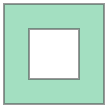

In [77]:
d

In [75]:
np.asarray([f, g]).T

array([[  0., 100.],
       [100., 100.],
       [100.,   0.],
       [  0.,   0.],
       [  0., 100.]])

In [73]:
g

array('d', [100.0, 100.0, 0.0, 0.0, 100.0])

In [4]:
super_t.geom

'POLYGON ((398.7715041472865 50, 423.7715041472865 50, 423.7715041472865 75, 1050 75, 1050 13, 1037 0, 613.5 0, 506.42670409480445 -75, 344.2440591535388 -1712, 330.0125320599427 -1725, -330.0125320599427 -1725, -344.2440591535388 -1712, -506.42670409480445 -75, -613.5 0, -1037 0, -1050 13, -1050 75, -423.7715041472865 75, -423.7715041472865 50, -398.7715041472865 50, -266.12378458128774 -1350.2293277386782, 0 -1400, 266.12378458128774 -1350.2293277386782, 398.7715041472865 50))'

In [6]:
slab.geom.wkt

'POLYGON ((-1050 75.00000000000011, 1050 75.00000000000011, 1050 255.0000000000001, -1050 255.0000000000001, -1050 75.00000000000011))'

In [7]:
dumps(slab.geom)

'POLYGON ((-1050.0000000000000000 75.0000000000001137, 1050.0000000000000000 75.0000000000001137, 1050.0000000000000000 255.0000000000001137, -1050.0000000000000000 255.0000000000001137, -1050.0000000000000000 75.0000000000001137))'

In [10]:
for idx, facet in enumerate(geom.facets):
    print(idx, facet)

0 [0, 1]
1 [1, 2]
2 [2, 3]
3 [3, 4]
4 [4, 5]
5 [5, 6]
6 [6, 7]
7 [7, 8]
8 [8, 9]
9 [9, 10]
10 [10, 11]
11 [11, 12]
12 [12, 13]
13 [13, 14]
14 [14, 15]
15 [15, 16]
16 [16, 17]
17 [17, 18]
18 [18, 19]
19 [19, 20]
20 [20, 21]
21 [21, 22]
22 [22, 0]
23 [16, 3]
24 [3, 23]
25 [23, 24]
26 [24, 16]


In [4]:
geom.points

[[398.771504147287, 50.0],
 [423.771504147287, 50.0],
 [423.771504147287, 75.0],
 [1050.0, 75.0],
 [1050.0, 13.0],
 [1037.0, 0.0],
 [613.5, 0.0],
 [506.426704094804, -75.0],
 [344.244059153539, -1712.0],
 [330.012532059943, -1725.0],
 [-330.012532059943, -1725.0],
 [-344.244059153539, -1712.0],
 [-506.426704094804, -75.0],
 [-613.5, 0.0],
 [-1037.0, 0.0],
 [-1050.0, 13.0],
 [-1050.0, 75.0],
 [-423.771504147287, 75.0],
 [-423.771504147287, 50.0],
 [-398.771504147287, 50.0],
 [-266.123784581288, -1350.229327738678],
 [0.0, -1400.0],
 [266.123784581288, -1350.229327738678],
 [-1050.0, 74.999999995007],
 [1050.0, 74.999999995007],
 [1050.0, 254.999999995007],
 [-1050.0, 254.999999995007]]

sectionproperties.pre.geometry.CompoundGeometry
object at: 0x2bd3304dee0
Materials incl.: ['40 MPa']


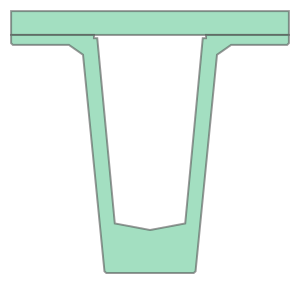

In [12]:
slab | super_t

In [17]:
slab.geom.wkt

'POLYGON ((-1050 75.00000000000011, 1050 75.00000000000011, 1050 255.0000000000001, -1050 255.0000000000001, -1050 75.00000000000011))'

In [16]:
list(slab.geom.normalize().exterior.coords)

[(-1050.0, 75.00000000000011),
 (-1050.0, 255.0000000000001),
 (1050.0, 255.0000000000001),
 (1050.0, 75.00000000000011),
 (-1050.0, 75.00000000000011)]

In [15]:
list(super_t.geom.exterior.coords)

[(398.7715041472865, 50.0),
 (423.7715041472865, 50.0),
 (423.7715041472865, 75.0),
 (1050.0, 75.0),
 (1050.0, 13.0),
 (1037.0, 0.0),
 (613.5, 0.0),
 (506.42670409480445, -75.0),
 (344.2440591535388, -1712.0),
 (330.0125320599427, -1725.0),
 (-330.0125320599427, -1725.0),
 (-344.2440591535388, -1712.0),
 (-506.42670409480445, -75.0),
 (-613.5, 0.0),
 (-1037.0, 0.0),
 (-1050.0, 13.0),
 (-1050.0, 75.0),
 (-423.7715041472865, 75.0),
 (-423.7715041472865, 50.0),
 (-398.7715041472865, 50.0),
 (-266.12378458128774, -1350.2293277386782),
 (0.0, -1400.0),
 (266.12378458128774, -1350.2293277386782),
 (398.7715041472865, 50.0)]

In [5]:
slab.points

[[-1050.0, 74.999999995007],
 [1050.0, 74.999999995007],
 [1050.0, 254.999999995007],
 [-1050.0, 254.999999995007]]

In [6]:
super_t.points

[[398.771504147287, 50.0],
 [423.771504147287, 50.0],
 [423.771504147287, 75.0],
 [1050.0, 75.0],
 [1050.0, 13.0],
 [1037.0, 0.0],
 [613.5, 0.0],
 [506.426704094804, -75.0],
 [344.244059153539, -1712.0],
 [330.012532059943, -1725.0],
 [-330.012532059943, -1725.0],
 [-344.244059153539, -1712.0],
 [-506.426704094804, -75.0],
 [-613.5, 0.0],
 [-1037.0, 0.0],
 [-1050.0, 13.0],
 [-1050.0, 75.0],
 [-423.771504147287, 75.0],
 [-423.771504147287, 50.0],
 [-398.771504147287, 50.0],
 [-266.123784581288, -1350.229327738678],
 [0.0, -1400.0],
 [266.123784581288, -1350.229327738678]]

In [34]:
import pathlib

In [39]:
section_holes_dxf = (
        pathlib.Path.cwd() / "sectionproperties" / "tests" / "section_holes.dxf"
)
dxf_geom = Geometry.from_dxf(section_holes_dxf)

In [41]:
dxf_geom.geom.wkt

'POLYGON ((-0.338658834889 -0.395177702895, -0.338658834889 29.092318216393, 31.962257588776 29.092318216393, 31.962257588776 -0.395177702895, -0.338658834889 -0.395177702895), (16.684315862478 2.382629883704, 29.683030851053 2.382629883704, 29.683030851053 24.355800152063, 16.684315862478 24.355800152063, 16.684315862478 2.382629883704), (1.548825807288 3.344178663681, 14.547540795863 3.344178663681, 14.547540795863 27.382898163101, 1.548825807288 27.382898163101, 1.548825807288 3.344178663681))'

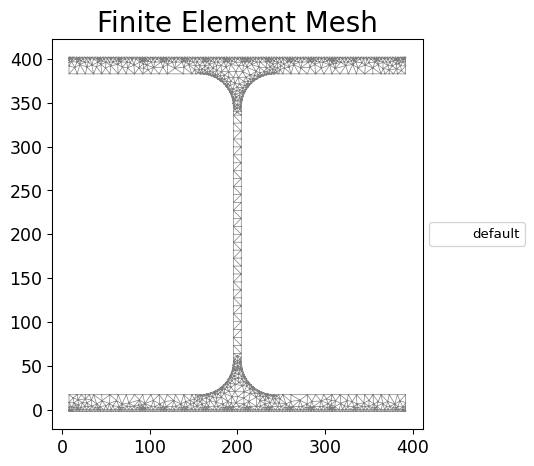

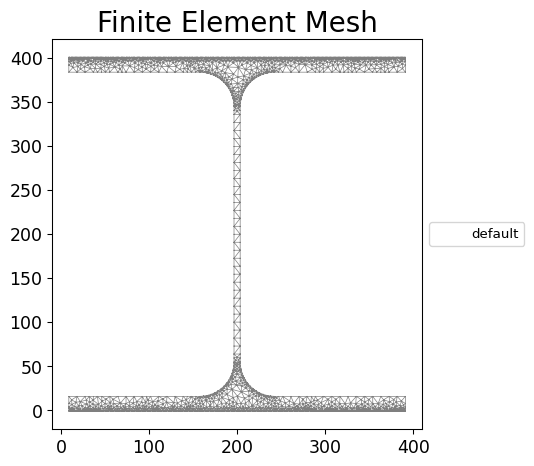

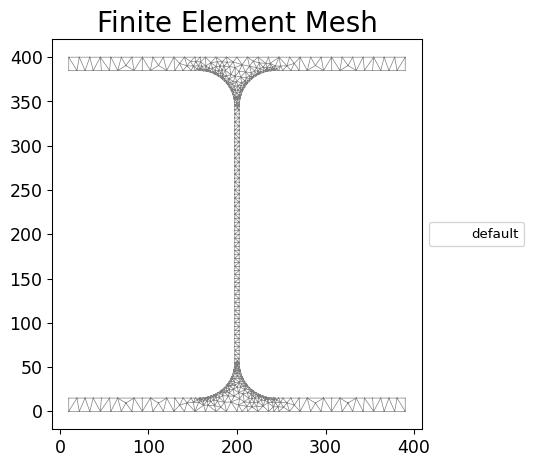

(<Figure size 750x500 with 1 Axes>,
 <AxesSubplot:title={'center':'Finite Element Mesh'}>)

In [62]:
from sectionproperties.pre.library import steel_sections
from sectionproperties.pre.library import primitive_sections as sections

uc = steel_sections.i_section(d=400, b=400, t_f=25, t_w=25, r=30, n_r=8)
plate1 = (
    sections.rectangular_section(b=500, d=10).align_center(uc).align_to(uc, "top")
)
plate2 = (
    sections.rectangular_section(b=500, d=10)
    .align_center(uc)
    .align_to(uc, "bottom")
)
geom = uc + plate1 + plate2

new_geom = geom.offset_perimeter(-8)
new_geom.create_mesh([100])
section = Section(new_geom)
section.plot_mesh()

new_geom = geom.offset_perimeter(-9)
new_geom.create_mesh([100])
section = Section(new_geom)
section.plot_mesh()

new_geom = geom.offset_perimeter(-10)
new_geom.create_mesh([100])
section = Section(new_geom)
section.plot_mesh()

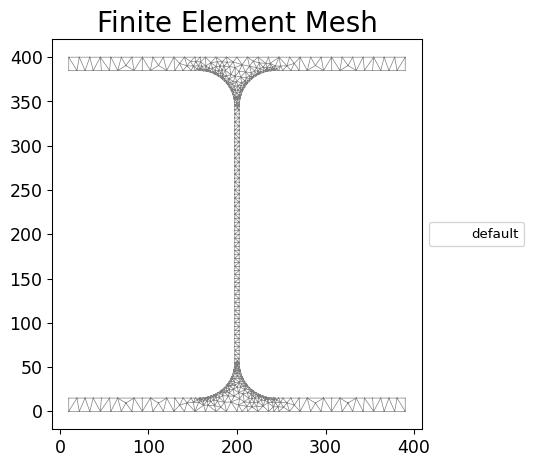

(<Figure size 750x500 with 1 Axes>,
 <AxesSubplot:title={'center':'Finite Element Mesh'}>)

In [60]:
section.plot_mesh()

In [51]:
from shapely.wkt import loads

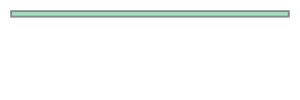

In [52]:
loads("POLYGON ((-50 400, 450 400, 450 410, -50 410, -50 400))")

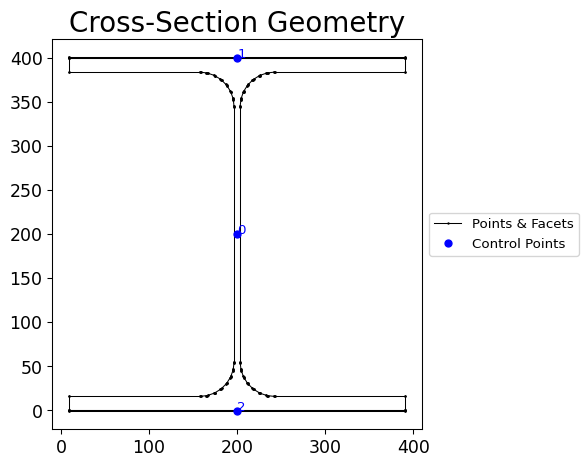

(<Figure size 750x500 with 1 Axes>,
 <AxesSubplot:title={'center':'Cross-Section Geometry'}>)

In [47]:
new_geom.plot_geometry()